# Understanding  and Visualizing Chipotle's Data


You can access the exercises and questions on Guilherme's page (https://github.com/guipsamora)
Access to the dataset her: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df = pd.read_csv(url, sep = '\t')

### Let's first get an idea of what we're working with 

In [3]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


Take a look at Column "item_price" - it's listed as an object and we need it as a float 

-Let's remove the $ dollar sign and covert from a "string to float

In [5]:
df['item_price'] = df['item_price'].str.slice(1)
df['item_price'] = pd.to_numeric(df['item_price'])
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


## Top 5 ordered item (item_name)? 

In [6]:
most_orders = df.groupby('item_name').agg({'quantity' : 'sum'})
most_orders = most_orders.sort_values(by = 'quantity', ascending = False).head()
most_orders

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


## Top 5 ordered sub-item? (choice_description) 

In [7]:
choice_des = df.groupby('choice_description').agg({'quantity' : 'sum'})
choice_des.sort_values(by = 'quantity', ascending = False).head()

,quantity
choice_description,
[Diet Coke],159
[Coke],143
[Sprite],89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",42


## Bar graph of the Top 5 ordered items

Text(0.5, 0, 'Items')

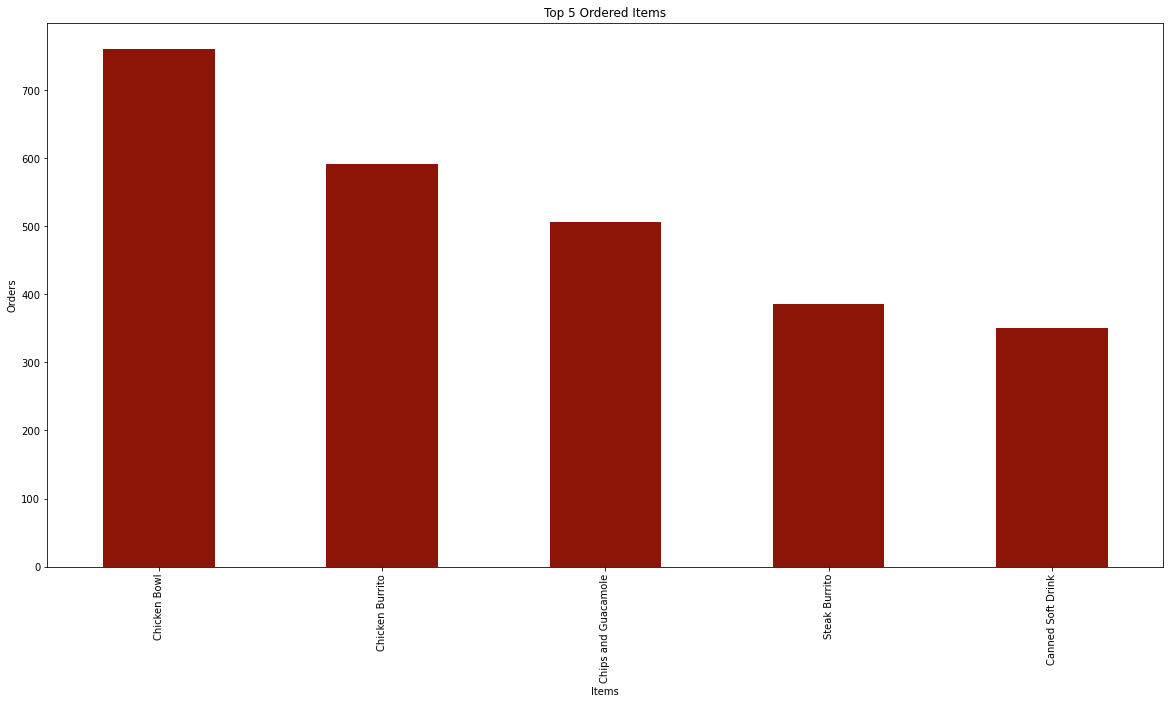

In [8]:
most_orders.plot(kind = 'bar', color = '#8C1505', legend = None, figsize=(20,10))
plt.title("Top 5 Ordered Items")
plt.ylabel("Orders")
plt.xlabel("Items")


## Let's take a look at the distribution of order prices 

Text(0.5, 0, 'Price')

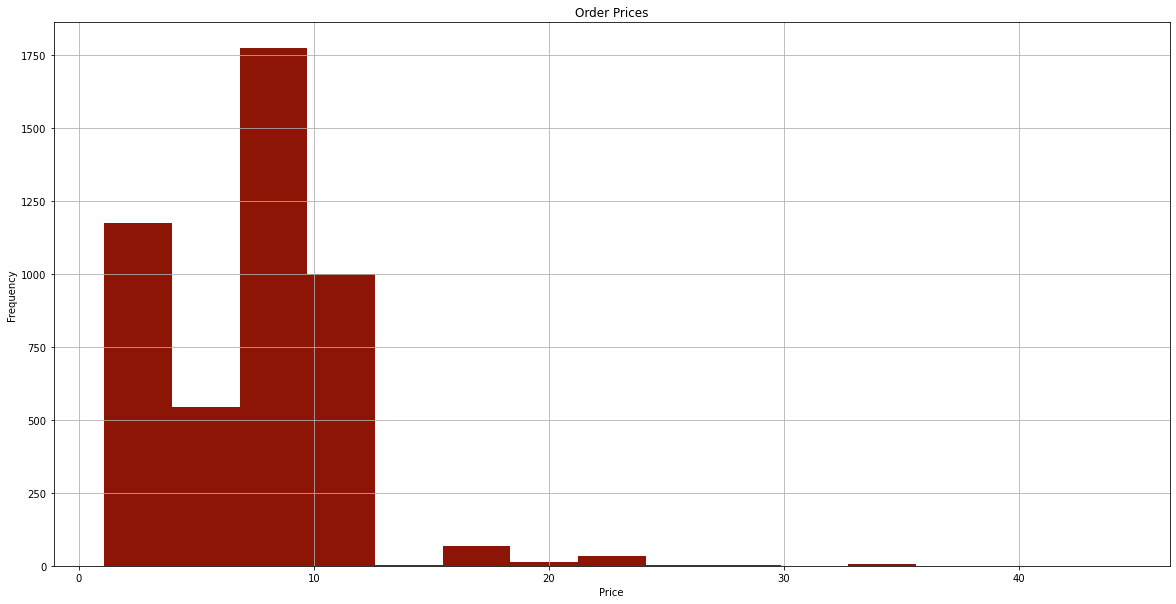

In [9]:
df['item_price'].hist(bins=15, color='#8C1505', figsize=(20,10))
plt.title('Order Prices')
plt.ylabel('Frequency')
plt.xlabel('Price')

## Total Revenue? 

In [13]:
revenue = (df['item_price'] * df['quantity']).sum()
revenue

39237.02

## Top 5 orders in terms of money spent / revenue

In [14]:
revs = df.groupby('order_id').agg({'revenue': 'sum'}).sort_values(by = 'revenue', ascending = False)
revs.head()

,revenue
order_id,
1443,1074.24
511,315.29
1559,246.00
1660,222.75
926,205.25


## More in depth view of Order_id 1443 

In [15]:
df[df['order_id'] == 1443]

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3599,1443,7,Bottled Water,NaN,10.50,73.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49,6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75,83.25
3604,1443,2,Bottled Water,NaN,3.00,6.00


## I want to find out out many choices (sides) people pick depending on the "main item"

In [16]:
#first lets see how many Nan values we have
nan_df = df[df.isna().any(axis = 1)]
nan_df.count()

order_id              1246
quantity              1246
item_name             1246
choice_description       0
item_price            1246
revenue               1246
dtype: int64

Let's create a function that gives us the length of choices

In [17]:
def choicesLength(x):
    if x == 'None':
        return 0
    else:
        return(len(x.split(',')))

In [18]:
df['choice_size'] = df['choice_description'].fillna('None').apply(choicesLength)
df['choice_size']

0       0
1       1
2       1
3       0
4       5
       ..
4617    7
4618    6
4619    5
4620    3
4621    4
Name: choice_size, Length: 4622, dtype: int64

In [19]:
choices = df.groupby('item_name')['choice_size'].mean().sort_values()
choices

item_name
Chips and Fresh Tomato Salsa             0.000000
Side of Chips                            0.000000
Chips and Tomatillo-Red Chili Salsa      0.000000
Bottled Water                            0.000000
Chips and Tomatillo-Green Chili Salsa    0.000000
Chips and Tomatillo Red Chili Salsa      0.000000
Chips and Tomatillo Green Chili Salsa    0.000000
Chips and Roasted Chili-Corn Salsa       0.000000
Chips and Roasted Chili Corn Salsa       0.000000
Chips and Mild Fresh Tomato Salsa        0.000000
Chips and Guacamole                      0.000000
Chips                                    0.000000
Nantucket Nectar                         1.000000
Izze                                     1.000000
Crispy Tacos                             1.000000
6 Pack Soft Drink                        1.000000
Canned Soft Drink                        1.000000
Canned Soda                              1.000000
Salad                                    3.000000
Chicken Soft Tacos                      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

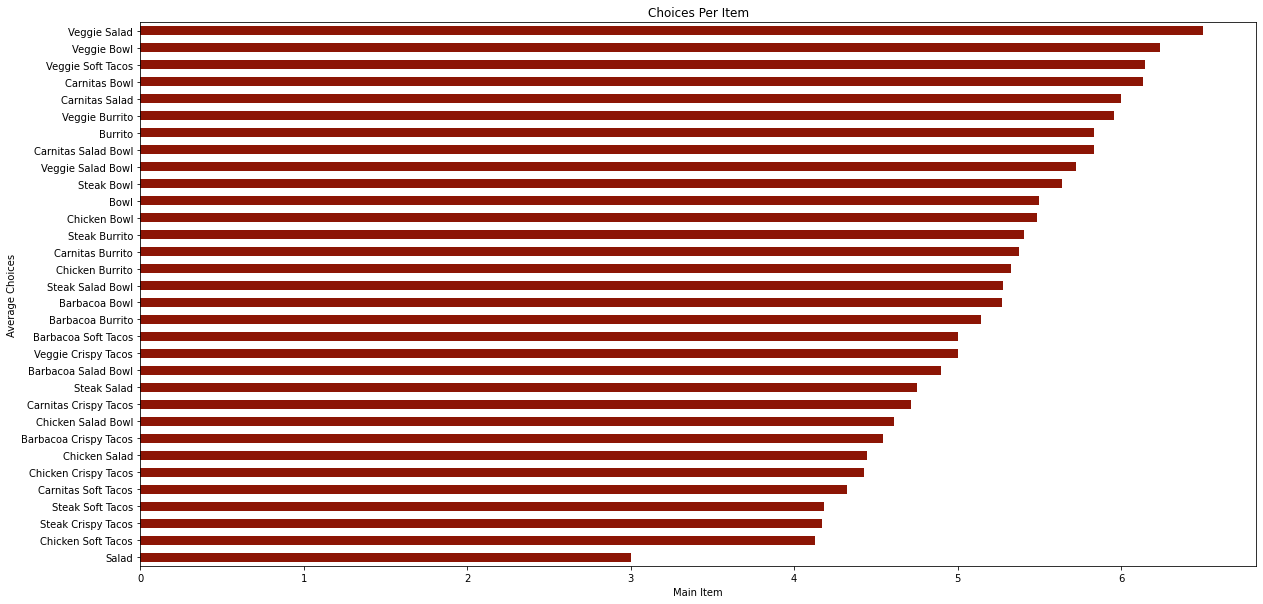

In [20]:
choices[choices > 2].plot(kind='barh', color='#8C1505', figsize=(20,10))
plt.title('Choices Per Item')
plt.xlabel('Main Item')
plt.ylabel('Average Choices')
plt.yticks(size = 10)


That's chipotle for you 
